Data_Flower

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
from keras.utils.vis_utils import plot_model
from matplotlib import image
from matplotlib import pyplot as plt
import os
import time
import tensorflow as tf
from tensorflow import keras
tf.config.run_functions_eagerly(True)

In [ ]:
for i in range(0, 56):
  # i = 100
  path_link_image = '/content/drive/MyDrive/To_Mau_Anh_Xam/GAN/Data_Flower'
  path_link_model = '/content/drive/MyDrive/To_Mau_Anh_Xam/GAN/Data_Flower/Model/Generator/generator_model_' + str(i) + '_4000.h5'
  path_save_image = '/content/drive/MyDrive/To_Mau_Anh_Xam/GAN/Data_Flower/Example_colorization'
  path_save_colorized_output = path_save_image + '/example_color_ep_' + str(i) + '_flower'+ '.jpg'


  img_size = 120
  x = []
  y = []

  rgb_image = Image.open( os.path.join( path_link_image , '3191.jpg' ) ).resize( ( img_size , img_size ) )
  rgb_img_array = (np.asarray( rgb_image ) ) / 255
  gray_image = rgb_image.convert( 'L' )
  gray_img_array = ( np.asarray( gray_image ).reshape( ( img_size , img_size , 1 ) ) ) / 255
  x.append( gray_img_array )
  y.append( rgb_img_array )
  test_x = np.array(x)
  test_y = np.array(y)

  #load model
  example_generator = tf.keras.models.load_model(path_link_model)

  y = example_generator( test_x ).numpy()

  plt.figure(figsize=(10,10))
  or_image = plt.subplot(3,3,1)
  or_image.set_title('Grayscale Input', fontsize=16)
  plt.imshow( test_x.reshape((120,120)) , cmap='gray' )
  in_image = plt.subplot(3,3,2)    
  image = Image.fromarray( ( y[0]* 255 ).astype( 'uint8' ) ).resize( ( 1024 , 1024 ) )
  image_co = np.asarray( image )
  in_image.set_title('Colorized Output', fontsize=16)
  plt.imshow( image_co )
  ou_image = plt.subplot(3,3,3)
  image = Image.fromarray( ( test_y[0] * 255 ).astype( 'uint8' ) ).resize( ( 1024 , 1024 ) )
  ou_image.set_title('Ground Truth', fontsize=16)
  plt.imshow( image )
  plt.show()

  tf.keras.utils.save_img(path_save_colorized_output, image_co, data_format=None, file_format=None, scale=True)
tf.keras.utils.save_img('/content/drive/MyDrive/To_Mau_Anh_Xam/GAN/Data_Flower/ground_truth_flower.jpg', image, data_format=None, file_format=None, scale=True)




Output hidden; open in https://colab.research.google.com to view.

In [12]:
# import the necessary packages
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
import numpy as np
import cv2
from math import log10, sqrt 
# import argparse

In [13]:
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

In [14]:
def PSNR(original, compressed):
 mse = np.mean((original - compressed) ** 2)
 if(mse == 0):
  return 100
 max_pixel = 255.0
 psnr = 20 * log10(max_pixel / sqrt(mse))
 return psnr

In [16]:
mse_result = []
ssim_result = []
psnr_result = []

for i in range(0, 56):
  path_save_ground_truth = '/content/drive/MyDrive/To_Mau_Anh_Xam/GAN/Data_Flower/ground_truth_flower.jpg'
  path_save_colorized_output = '/content/drive/MyDrive/To_Mau_Anh_Xam/GAN/Data_Flower/Example_colorization' + '/example_color_ep_' + str(i) +'_flower'+ '.jpg'

  ground_truth = cv2.imread(path_save_ground_truth)
  colorized_output = cv2.imread(path_save_colorized_output)
  p = PSNR(ground_truth, colorized_output)
  m = mse(ground_truth, colorized_output)
  s = ssim(ground_truth, colorized_output, multichannel=True)
  # setup the figure
  image_ground_truth = keras.preprocessing.image.load_img(path_save_ground_truth)
  image_colorized_output = keras.preprocessing.image.load_img(path_save_colorized_output)
  fig = plt.figure('Ground Truth vs Colorized Output')
  plt.suptitle(" %d -  PSNR: %.3f  -  MSE: %.3f  -  SSIM: %.3f" % ( i,p, m, s))
  # show first image
  ax = fig.add_subplot(1, 2, 1)
  plt.imshow(image_colorized_output)
  plt.axis("off")
  # show the second image
  ax = fig.add_subplot(1, 2, 2)
  plt.imshow(image_ground_truth)
  plt.axis("off")
  # show the images
  plt.show()
  mse_result.append(m)
  ssim_result.append(s)
  psnr_result.append(p)


Output hidden; open in https://colab.research.google.com to view.

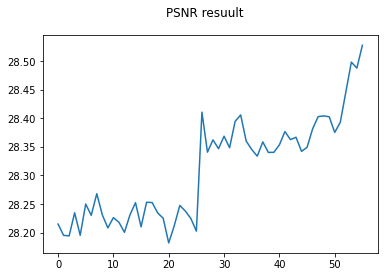

In [17]:
plt.suptitle('PSNR resuult')
plt.plot(psnr_result)

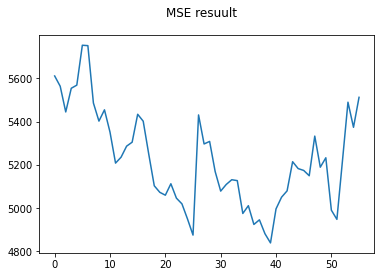

In [18]:
plt.suptitle('MSE resuult')
plt.plot(mse_result)

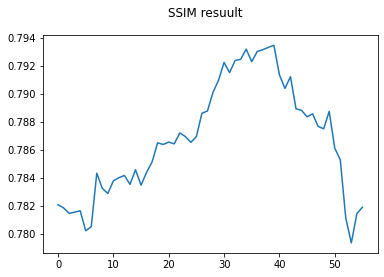

In [19]:
plt.suptitle('SSIM resuult')
plt.plot(ssim_result)



---
Data_Cat


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
from keras.utils.vis_utils import plot_model
from matplotlib import image
from matplotlib import pyplot as plt
import os
import time
import tensorflow as tf
from tensorflow import keras
tf.config.run_functions_eagerly(True)

In [3]:
# import the necessary packages
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
import numpy as np
import cv2
from math import log10, sqrt 
# import argparse

In [4]:
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

In [5]:
def PSNR(original, compressed):
 mse = np.mean((original - compressed) ** 2)
 if(mse == 0):
  return 100
 max_pixel = 255.0
 psnr = 20 * log10(max_pixel / sqrt(mse))
 return psnr

In [7]:
mse_result = []
ssim_result = []
psnr_result = []

for i in range(0, 51):
  path_save_ground_truth = '/content/drive/MyDrive/To_Mau_Anh_Xam/GAN/Data_Cat/ground_truth_cat.jpg'
  path_save_colorized_output = '/content/drive/MyDrive/To_Mau_Anh_Xam/GAN/Data_Cat/Example_colorization' + '/example_color_ep_' + str(i) +'_cat_1'+ '.jpg'

  ground_truth = cv2.imread(path_save_ground_truth)
  colorized_output = cv2.imread(path_save_colorized_output)
  p = PSNR(ground_truth, colorized_output)
  m = mse(ground_truth, colorized_output)
  s = ssim(ground_truth, colorized_output, multichannel=True)
  # setup the figure
  image_ground_truth = keras.preprocessing.image.load_img(path_save_ground_truth)
  image_colorized_output = keras.preprocessing.image.load_img(path_save_colorized_output)
  fig = plt.figure('Ground Truth vs Colorized Output')
  plt.suptitle(" %d -  PSNR: %.3f  -  MSE: %.3f  -  SSIM: %.3f" % ( i,p, m, s))
  # show first image
  ax = fig.add_subplot(1, 2, 1)
  plt.imshow(image_colorized_output)
  plt.axis("off")
  # show the second image
  ax = fig.add_subplot(1, 2, 2)
  plt.imshow(image_ground_truth)
  plt.axis("off")
  # show the images
  plt.show()
  mse_result.append(m)
  ssim_result.append(s)
  psnr_result.append(p)

for i in range(50, 101, 10):
  path_save_ground_truth = '/content/drive/MyDrive/To_Mau_Anh_Xam/GAN/Data_Cat/ground_truth_cat.jpg'
  path_save_colorized_output = '/content/drive/MyDrive/To_Mau_Anh_Xam/GAN/Data_Cat/Example_colorization' + '/example_color_ep_' + str(i) +'_cat_1'+ '.jpg'

  ground_truth = cv2.imread(path_save_ground_truth)
  colorized_output = cv2.imread(path_save_colorized_output)
  p = PSNR(ground_truth, colorized_output)
  m = mse(ground_truth, colorized_output)
  s = ssim(ground_truth, colorized_output, multichannel=True)
  # setup the figure
  image_ground_truth = keras.preprocessing.image.load_img(path_save_ground_truth)
  image_colorized_output = keras.preprocessing.image.load_img(path_save_colorized_output)
  fig = plt.figure('Ground Truth vs Colorized Output')
  plt.suptitle(" %d -  PSNR: %.3f  -  MSE: %.3f  -  SSIM: %.3f" % ( i,p, m, s))
  # show first image
  ax = fig.add_subplot(1, 2, 1)
  plt.imshow(image_colorized_output)
  plt.axis("off")
  # show the second image
  ax = fig.add_subplot(1, 2, 2)
  plt.imshow(image_ground_truth)
  plt.axis("off")
  # show the images
  plt.show()
  mse_result.append(m)
  ssim_result.append(s)
  psnr_result.append(p)

Output hidden; open in https://colab.research.google.com to view.

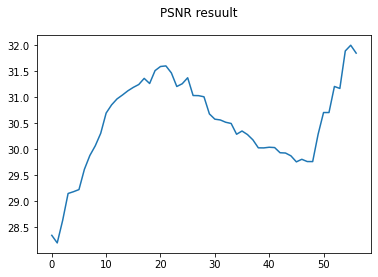

In [8]:
plt.suptitle('PSNR resuult')
plt.plot(psnr_result)

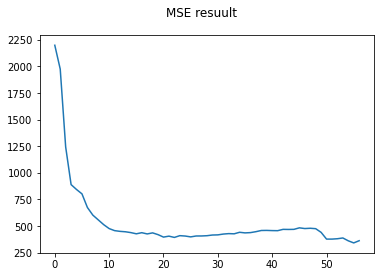

In [9]:
plt.suptitle('MSE resuult')
plt.plot(mse_result)

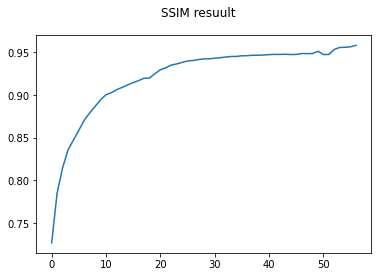

In [10]:
plt.suptitle('SSIM resuult')
plt.plot(ssim_result)



---

